In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
  
# import file with data
x_test  = np.load('../../data/test_monthmean.npy')
x_test = x_test.reshape((x_test.shape[0],-1,x_test.shape[-1]))
x_test = np.delete(x_test,(57,58,59),axis = 1)
x_test = x_test.reshape((-1,38))
data = pd.DataFrame(x_test)
data.head



<bound method NDFrame.head of              0      1         2          3         4    5        6         7   \
0        -55.75 -67.00  201201.5  22.069546  0.156014  0.0  0.00037  0.035766   
1        -55.75 -67.00  201202.5  22.069546  0.156014  0.0  0.00037  0.035766   
2        -55.75 -67.00  201203.5  22.069546  0.156014  0.0  0.00037  0.035766   
3        -55.75 -67.00  201204.5  22.069546  0.156014  0.0  0.00037  0.035766   
4        -55.75 -67.00  201205.5  22.069546  0.156014  0.0  0.00037  0.035766   
...         ...    ...       ...        ...       ...  ...      ...       ...   
13921846  83.75 -33.75  201605.5   0.000000  0.000000  0.0  0.00000  0.000000   
13921847  83.75 -33.75  201606.5   0.000000  0.000000  0.0  0.00000  0.000000   
13921848  83.75 -33.75  201607.5   0.000000  0.000000  0.0  0.00000  0.000000   
13921849  83.75 -33.75  201608.5   0.000000  0.000000  0.0  0.00000  0.000000   
13921850  83.75 -33.75  201609.5   0.000000  0.000000  0.0  0.00000  0.000000  

In [2]:
data.columns = ['lat 0', 'lon 1', 'time 2', 'agb 3', 'pft_fracCover 4', 'sm 5', 'pftCrop 6',
       'pftHerb 7', 'pftShrubBD 8', 'pftShrubNE 9', 'pftTreeBD 10', 'pftTreeBE 11',
       'pftTreeND 12', 'pftTreeNE 13', 'GDP 14', 'ign 15', 'Distance_to_populated_areas 16',
       'fPAR 17', 'LAI 18', 'NLDI 19', 'vod_K_anomalies 20', 'FPAR_12mon 21', 'LAI_12mon 22',
       'Vod_k_anomaly_12mon 23', 'FPAR_06mon 24', 'LAI_06mon 25', 'Vod_k_anomaly_06mon 26',
       'WDPA_fracCover 27', 'dtr 28', 'pet 29', 'tmx 30', 'wet 31', 'Biome 32', 'precip 33',
       'Livestock 34', 'road_density 35', 'topo 36', 'pop_density 37']

                                       lat 0         lon 1        time 2  \
lat 0                           1.000000e+00 -5.738603e-02  8.919487e-12   
lon 1                          -5.738603e-02  1.000000e+00 -1.201339e-13   
time 2                          8.919487e-12 -1.201339e-13  1.000000e+00   
agb 3                          -2.624825e-01 -1.209171e-01 -5.194696e-12   
pft_fracCover 4                -1.936172e-01  4.836693e-02 -1.573526e-04   
sm 5                            3.199411e-02  1.276058e-01  6.594652e-03   
pftCrop 6                      -1.334578e-01  5.355933e-02 -2.596942e-04   
pftHerb 7                       2.402521e-02  8.740889e-02  2.771455e-04   
pftShrubBD 8                   -1.980629e-01  1.317952e-01  1.357042e-04   
pftShrubNE 9                    2.557311e-02 -2.172489e-02  1.761859e-04   
pftTreeBD 10                   -5.992975e-02  1.484664e-02  2.046874e-04   
pftTreeBE 11                   -3.466018e-01 -8.311059e-02 -5.414285e-05   
pftTreeND 12

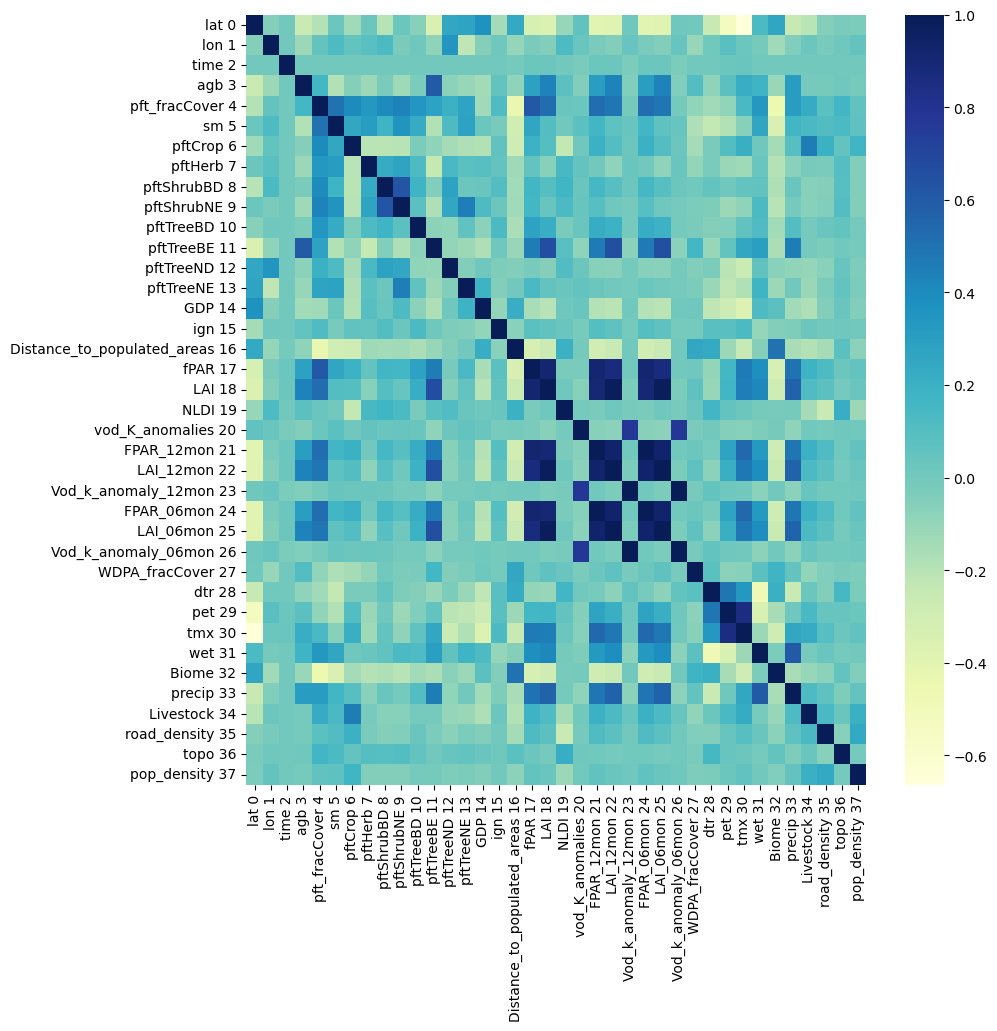

In [3]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
mp.figure(figsize=(10,10))
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
mp.show()

In [10]:
mp.figure(figsize=(10,10))
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=False)
mp.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

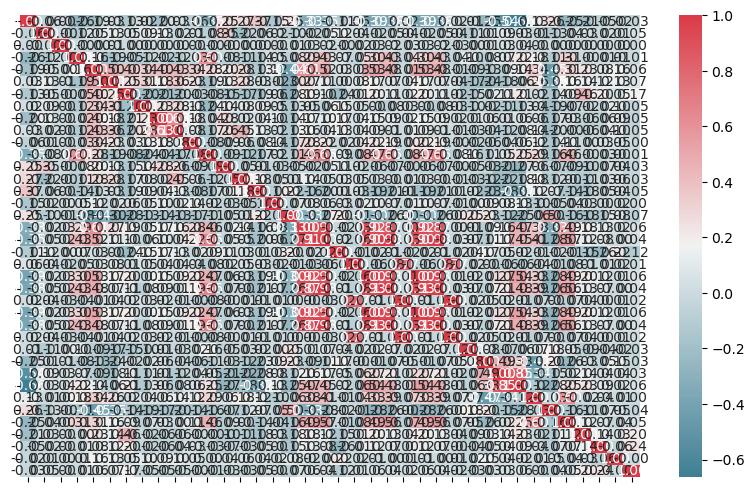

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
corr = data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', ax=ax)

# Turn off the axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Show the plot
plt.show()

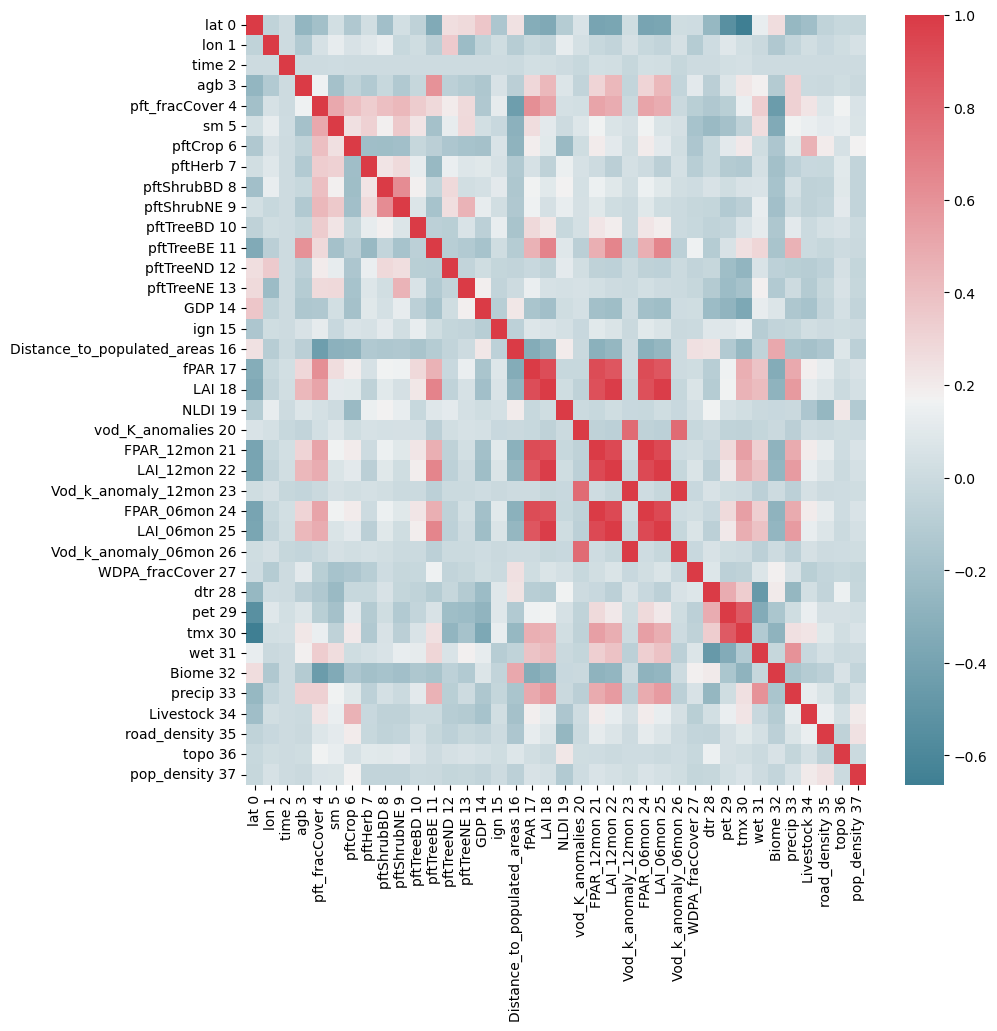

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

df = data

# Calculate correlations
corr = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=False, fmt='.2f', ax=ax)

# Add custom hover effect
for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, '{:.2f}'.format(corr.iloc[i, j]),
                       ha="center", va="center", color="w", fontsize=14)
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                               path_effects.Normal()])
        text.set_visible(False)
        def hover(event):
            for t in ax.texts:
                t.set_visible(False)
            if event.inaxes == ax:
                for t in event.texts:
                    t.set_visible(True)
        fig.canvas.mpl_connect("motion_notify_event", hover)

# Show the plot
plt.show()


In [7]:
corr.to_csv('correlation.csv')

In [8]:
corr = pd.read_csv('correlation.csv')

In [9]:
corr

,Unnamed: 0,lat 0,lon 1,time 2,agb 3,pft_fracCover 4,sm 5,pftCrop 6,pftHerb 7,pftShrubBD 8,...,dtr 28,pet 29,tmx 30,wet 31,Biome 32,precip 33,Livestock 34,road_density 35,topo 36,pop_density 37
0,lat 0,1.000000e+00,-5.738603e-02,8.919487e-12,-2.624825e-01,-0.193617,0.031994,-0.133458,0.024025,-0.198063,...,-0.249252,-0.537365,-0.663113,0.131641,2.618677e-01,-0.253289,-2.082631e-01,-5.446564e-02,-2.056428e-02,-0.029222
1,lon 1,-5.738603e-02,1.000000e+00,-1.201339e-13,-1.209171e-01,0.048367,0.127606,0.053559,0.087409,0.131795,...,0.008839,0.085386,0.031657,-0.010462,-1.316417e-01,-0.040349,2.544310e-02,-1.635685e-02,1.256822e-02,0.047593
2,time 2,8.919487e-12,-1.201339e-13,1.000000e+00,-5.194696e-12,-0.000157,0.006595,-0.000260,0.000277,0.000136,...,0.005216,0.027745,0.036765,0.004304,-2.846393e-13,0.001879,3.511538e-12,4.080729e-12,3.681542e-14,0.001701
3,agb 3,-2.624825e-01,-1.209171e-01,-5.194696e-12,1.000000e+00,0.159846,-0.185413,-0.054123,-0.122169,-0.020258,...,-0.081172,0.073052,0.215549,0.180230,-1.114750e-01,0.313357,-2.741528e-03,-1.289057e-02,1.279193e-02,-0.011672
4,pft_fracCover 4,-1.936172e-01,4.836693e-02,-1.573526e-04,1.598460e-01,1.000000,0.503316,0.400498,0.335346,0.396612,...,-0.131918,-0.089179,0.136865,0.335576,-4.497747e-01,0.314571,2.304382e-01,8.067105e-02,1.645767e-01,0.059821
5,sm 5,3.199411e-02,1.276058e-01,6.594652e-03,-1.854135e-01,0.503316,1.000000,0.251949,0.314932,0.176304,...,-0.235623,-0.184797,-0.061548,0.261199,-3.508531e-01,0.163799,1.369240e-01,1.159100e-01,1.311371e-01,0.067990
6,pftCrop 6,-1.334578e-01,5.355933e-02,-2.596942e-04,-5.412253e-02,0.400498,0.251949,1.000000,-0.203773,-0.210127,...,-0.022307,0.108916,0.209519,0.015224,-1.447372e-01,0.090622,4.580484e-01,1.990437e-01,4.832640e-02,0.174372
7,pftHerb 7,2.402521e-02,8.740889e-02,2.771455e-04,-1.221694e-01,0.335346,0.314932,-0.203773,1.000000,0.229328,...,-0.023479,-0.113403,-0.125674,0.036638,-1.912129e-01,-0.065850,-1.922789e-02,-2.494039e-02,1.013457e-01,-0.048766
8,pftShrubBD 8,-1.980629e-01,1.317952e-01,1.357042e-04,-2.025771e-02,0.396612,0.176304,-0.210127,0.229328,1.000000,...,0.056210,0.014569,0.056758,0.062160,-1.721812e-01,0.032683,-6.413735e-02,-5.683884e-02,9.202640e-02,-0.050455
9,pftShrubNE 9,2.557311e-02,-2.172489e-02,1.761859e-04,-1.243704e-01,0.429664,0.356655,-0.197109,0.278006,0.628269,...,-0.036773,-0.123538,-0.079996,0.135817,-1.988607e-01,-0.004060,-5.955216e-02,-4.256600e-02,1.035545e-01,-0.046957


In [10]:
corr.set_index('Unnamed: 0',inplace = True)
corr

,lat 0,lon 1,time 2,agb 3,pft_fracCover 4,sm 5,pftCrop 6,pftHerb 7,pftShrubBD 8,pftShrubNE 9,...,dtr 28,pet 29,tmx 30,wet 31,Biome 32,precip 33,Livestock 34,road_density 35,topo 36,pop_density 37
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
lat 0,1.000000e+00,-5.738603e-02,8.919487e-12,-2.624825e-01,-0.193617,0.031994,-0.133458,0.024025,-0.198063,0.025573,...,-0.249252,-0.537365,-0.663113,0.131641,2.618677e-01,-0.253289,-2.082631e-01,-5.446564e-02,-2.056428e-02,-0.029222
lon 1,-5.738603e-02,1.000000e+00,-1.201339e-13,-1.209171e-01,0.048367,0.127606,0.053559,0.087409,0.131795,-0.021725,...,0.008839,0.085386,0.031657,-0.010462,-1.316417e-01,-0.040349,2.544310e-02,-1.635685e-02,1.256822e-02,0.047593
time 2,8.919487e-12,-1.201339e-13,1.000000e+00,-5.194696e-12,-0.000157,0.006595,-0.000260,0.000277,0.000136,0.000176,...,0.005216,0.027745,0.036765,0.004304,-2.846393e-13,0.001879,3.511538e-12,4.080729e-12,3.681542e-14,0.001701
agb 3,-2.624825e-01,-1.209171e-01,-5.194696e-12,1.000000e+00,0.159846,-0.185413,-0.054123,-0.122169,-0.020258,-0.124370,...,-0.081172,0.073052,0.215549,0.180230,-1.114750e-01,0.313357,-2.741528e-03,-1.289057e-02,1.279193e-02,-0.011672
pft_fracCover 4,-1.936172e-01,4.836693e-02,-1.573526e-04,1.598460e-01,1.000000,0.503316,0.400498,0.335346,0.396612,0.429664,...,-0.131918,-0.089179,0.136865,0.335576,-4.497747e-01,0.314571,2.304382e-01,8.067105e-02,1.645767e-01,0.059821
sm 5,3.199411e-02,1.276058e-01,6.594652e-03,-1.854135e-01,0.503316,1.000000,0.251949,0.314932,0.176304,0.356655,...,-0.235623,-0.184797,-0.061548,0.261199,-3.508531e-01,0.163799,1.369240e-01,1.159100e-01,1.311371e-01,0.067990
pftCrop 6,-1.334578e-01,5.355933e-02,-2.596942e-04,-5.412253e-02,0.400498,0.251949,1.000000,-0.203773,-0.210127,-0.197109,...,-0.022307,0.108916,0.209519,0.015224,-1.447372e-01,0.090622,4.580484e-01,1.990437e-01,4.832640e-02,0.174372
pftHerb 7,2.402521e-02,8.740889e-02,2.771455e-04,-1.221694e-01,0.335346,0.314932,-0.203773,1.000000,0.229328,0.278006,...,-0.023479,-0.113403,-0.125674,0.036638,-1.912129e-01,-0.065850,-1.922789e-02,-2.494039e-02,1.013457e-01,-0.048766
pftShrubBD 8,-1.980629e-01,1.317952e-01,1.357042e-04,-2.025771e-02,0.396612,0.176304,-0.210127,0.229328,1.000000,0.628269,...,0.056210,0.014569,0.056758,0.062160,-1.721812e-01,0.032683,-6.413735e-02,-5.683884e-02,9.202640e-02,-0.050455


In [12]:
corr.style.format({'column_name': '{:,.2f}'})
corr

,lat 0,lon 1,time 2,agb 3,pft_fracCover 4,sm 5,pftCrop 6,pftHerb 7,pftShrubBD 8,pftShrubNE 9,...,dtr 28,pet 29,tmx 30,wet 31,Biome 32,precip 33,Livestock 34,road_density 35,topo 36,pop_density 37
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
lat 0,1.000000e+00,-5.738603e-02,8.919487e-12,-2.624825e-01,-0.193617,0.031994,-0.133458,0.024025,-0.198063,0.025573,...,-0.249252,-0.537365,-0.663113,0.131641,2.618677e-01,-0.253289,-2.082631e-01,-5.446564e-02,-2.056428e-02,-0.029222
lon 1,-5.738603e-02,1.000000e+00,-1.201339e-13,-1.209171e-01,0.048367,0.127606,0.053559,0.087409,0.131795,-0.021725,...,0.008839,0.085386,0.031657,-0.010462,-1.316417e-01,-0.040349,2.544310e-02,-1.635685e-02,1.256822e-02,0.047593
time 2,8.919487e-12,-1.201339e-13,1.000000e+00,-5.194696e-12,-0.000157,0.006595,-0.000260,0.000277,0.000136,0.000176,...,0.005216,0.027745,0.036765,0.004304,-2.846393e-13,0.001879,3.511538e-12,4.080729e-12,3.681542e-14,0.001701
agb 3,-2.624825e-01,-1.209171e-01,-5.194696e-12,1.000000e+00,0.159846,-0.185413,-0.054123,-0.122169,-0.020258,-0.124370,...,-0.081172,0.073052,0.215549,0.180230,-1.114750e-01,0.313357,-2.741528e-03,-1.289057e-02,1.279193e-02,-0.011672
pft_fracCover 4,-1.936172e-01,4.836693e-02,-1.573526e-04,1.598460e-01,1.000000,0.503316,0.400498,0.335346,0.396612,0.429664,...,-0.131918,-0.089179,0.136865,0.335576,-4.497747e-01,0.314571,2.304382e-01,8.067105e-02,1.645767e-01,0.059821
sm 5,3.199411e-02,1.276058e-01,6.594652e-03,-1.854135e-01,0.503316,1.000000,0.251949,0.314932,0.176304,0.356655,...,-0.235623,-0.184797,-0.061548,0.261199,-3.508531e-01,0.163799,1.369240e-01,1.159100e-01,1.311371e-01,0.067990
pftCrop 6,-1.334578e-01,5.355933e-02,-2.596942e-04,-5.412253e-02,0.400498,0.251949,1.000000,-0.203773,-0.210127,-0.197109,...,-0.022307,0.108916,0.209519,0.015224,-1.447372e-01,0.090622,4.580484e-01,1.990437e-01,4.832640e-02,0.174372
pftHerb 7,2.402521e-02,8.740889e-02,2.771455e-04,-1.221694e-01,0.335346,0.314932,-0.203773,1.000000,0.229328,0.278006,...,-0.023479,-0.113403,-0.125674,0.036638,-1.912129e-01,-0.065850,-1.922789e-02,-2.494039e-02,1.013457e-01,-0.048766
pftShrubBD 8,-1.980629e-01,1.317952e-01,1.357042e-04,-2.025771e-02,0.396612,0.176304,-0.210127,0.229328,1.000000,0.628269,...,0.056210,0.014569,0.056758,0.062160,-1.721812e-01,0.032683,-6.413735e-02,-5.683884e-02,9.202640e-02,-0.050455


In [13]:
corr.plot(kind='heatmap', cmap='YlGnBu')

ValueError: heatmap is not a valid plot kind

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

x_test  = np.load('../../data/test_monthmean.npy')
x_test = x_test.reshape((x_test.shape[0],-1,x_test.shape[-1]))
x_test = np.delete(x_test,(57,58,59),axis = 1)
x_test = x_test.reshape((-1,38))
df = pd.DataFrame(x_test)
df.columns = ['lat 0', 'lon 1', 'time 2', 'agb 3', 'pft_fracCover 4', 'sm 5', 'pftCrop 6',
       'pftHerb 7', 'pftShrubBD 8', 'pftShrubNE 9', 'pftTreeBD 10', 'pftTreeBE 11',
       'pftTreeND 12', 'pftTreeNE 13', 'GDP 14', 'ign 15', 'Distance_to_populated_areas 16',
       'fPAR 17', 'LAI 18', 'NLDI 19', 'vod_K_anomalies 20', 'FPAR_12mon 21', 'LAI_12mon 22',
       'Vod_k_anomaly_12mon 23', 'FPAR_06mon 24', 'LAI_06mon 25', 'Vod_k_anomaly_06mon 26',
       'WDPA_fracCover 27', 'dtr 28', 'pet 29', 'tmx 30', 'wet 31', 'Biome 32', 'precip 33',
       'Livestock 34', 'road_density 35', 'topo 36', 'pop_density 37']
# Calculate correlations
corr = df.corr()
#use picnic as diverging scale

# Plot the DataFrame as an interactive heatmap
fig = px.imshow(corr, color_continuous_scale='picnic',zmin= -1, zmax=1)
fig.write_html('corr.html')


In [20]:
gdp = df[['GDP 14', 'NLDI 19']]
corr_gdp = gdp.corr()
corr_gdp

,GDP 14,NLDI 19
GDP 14,1.000000,0.014865
NLDI 19,0.014865,1.000000
